<a href="https://colab.research.google.com/github/mostafizur1997/Deep-Learning/blob/main/Medical_Cost_Calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Read the insurance dataset
insurance =pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [ ]:
#check out the insurance dataset
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#Turn all categories into numbers

insurance_one_hot =pd.get_dummies(insurance)

insurance_one_hot.head() #view the converted columns

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# create X and Y labels
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [ ]:
#create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42) # # set random state for reproducible 

#Build and fit a model

In [ ]:
from keras.api._v2.keras import optimizers
#set random seed
tf.random.set_seed(42)

#create a new model 
insurance_model=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

#compile the model
insurance_model.compile(
    loss= tf.keras.losses.mae,
    optimizer= tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

#Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8766.5059 - mae: 8766.5059
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7876.7534 - mae: 7876.7534
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7591.1558 - mae: 7591.1558
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7549.7471 - mae: 7549.7471
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7745.0122 - mae: 7745.0122
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7623.8525 - mae: 7623.8525
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7587.9966 - mae: 7587.9966
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7775.6904 - mae: 7775.6904
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7596.6030 - mae: 7596.6030
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7730.9487 - mae: 7730.9487

In [ ]:
# check the results of the insurance model

insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 8024.1299 - mae: 8024.1299


[8024.1298828125, 8024.1298828125]

In [ ]:
# check the results of the insurance model
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8024.1299 - mae: 8024.1299


[8024.1298828125, 8024.1298828125]

#check the result of the insurance model

We will try with 3 things:

* Increasing the number of layers (2 -> 3).
* Increasing the number of units in each layer (except for the output layer).
* Changing the optimizer (from SGD to Adam).

In [ ]:

#set random seed
tf.random.set_seed(42)

#create a new model 
insurance_model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100), #100 units
    tf.keras.layers.Dense(10), #10 units
    tf.keras.layers.Dense(1) #1 unit (important for output layer)
])

#compile the model
insurance_model_2.compile(
    loss= tf.keras.losses.mae,
    optimizer= tf.keras.optimizers.Adam(), # adam works but SGD doesnot
    metrics=["mae"]
)

#Fit the model and save the history
history= insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
#Evaluate our larger layer
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 8ms/step - loss: 4753.5337 - mae: 4753.5337


[4753.53369140625, 4753.53369140625]

Text(0.5, 0, 'epochs')

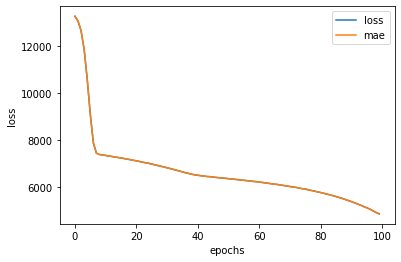

In [ ]:
#plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
#Try training for little longer
history_2 =insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
# Evaluate the model trained for 200 total epochs
insurance_model_2_loss, insurance_model_2_mae =insurance_model_2.evaluate(X_test,y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 [==============================] - 0s 2ms/step - loss: 3490.5938 - mae: 3490.5938


(3490.59375, 3490.59375)

Text(0.5, 0, 'epochs')

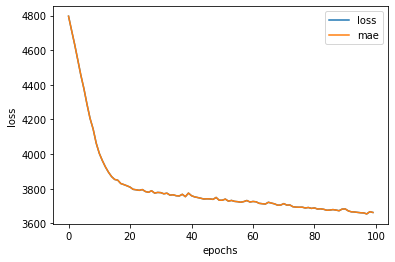

In [ ]:
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

##preprocessing data (normalization and standardization)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

#read the insurance dataset
insurnace = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")


In [ ]:
# check out the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Make_column_transformer - build a multi-step data preprocessing function for the folllowing transformations:

* MinMaxScaler - make sure all numerical columns are normalized (between 0 and 1).

* OneHotEncoder - one hot encode the non-numerical columns.

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

#create column transfomer (this will help us normalize/ preprocess our data)
ct =make_column_transformer(
    (MinMaxScaler(),["age", "bmi","children"]), #get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker", "region"])

    )

#create X and y 
X= insurance.drop("charges", axis=1)
y= insurance["charges"]

#Build our train and test sets (use random state to ensure same split as before)
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state= 42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal =ct.transform(X_train)
X_test_normal =ct.transform(X_test)

In [ ]:
#Non-normalize and non-one-hot encoded data example
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
#Normalized and one_hot encoded example
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

In [ ]:

# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=0) 

In [ ]:
#evaluate 3rd model 
insurance_model_3_loss, insurance_model_3_mae =insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3170.7871 - mae: 3170.7871


In [ ]:
#compare modelling results from non-normalized data and normalized data
insurance_model_2_mae, insurance_model_3_mae

(3490.59375, 3170.787109375)